# Introducción

Este proyecto analiza datos de la aplicación de citas online OKCupid. En los últimos años, ha habido un crecimiento masivo en el uso de aplicaciones de citas para encontrar el amor. Muchas de estas apps usan técnicas sofisticadas de ciencia de datos para recomendar posibles coincidencias a los usuarios y para optimizar la experiencia del usuario. Estas apps nos dan acceso a una gran cantidad de información, que nunca habiamos tenido antes, sobre como personas diferentes experimentan el romance.

El objetivo de este proyecto es desarrollar, preparar, analizar y crear un sistema de aprendizaje automático para resolver unas preguntas.


**Recursos de datos:**

Codecademy.com nos proporcionó el archivo de datos `profiles.csv`.

## Desarrollo

Es beneficioso el crear un proyecto de desarrollo si estamos empezando un nuevo proyecto. Abajo están las cuatro secciones para servirnos de guía de ayuda en el proceso y progreso del proyecto. La primera sección es los objetivos del proyecto, una sección para definir los objetivos de alto nivel e introducir las intenciones de este proyecto. La siguiente sección es los datos, afortunadamente en este proyecto, los datos ya están provistos pero todavía necesita ser comprobado si los objetivos del proyecto pueden ser alcanzados con los datos disponibles. En tercer lugar, habrá que pensar en el análisis, el cuál incluye los métodos y la alineación de las preguntas con los objetivos del proyecto. Por último, la evaluación ayudará a extraer conclusiones y hallazgos del análisis.  

### Objetivos del Proyecto

En este proyecto, el objetivo es utilizar las habilidades aprendidas a través de Codecademy y aplicar las técnicas de aprendizaje automático a un conjunto de datos. La principal pregunta de investigación que responderemos es si los signos astrológicos de los usuarios de OkCupid se pueden predecir utilizando otras variables de sus perfiles. Este proyecto es importante puesto que muchos usuarios encuentran los signos astrológicos una parte importante de coincidencia, y si los usuarios no introducen sus signos, a OKCupid le gustaría predecir que signo podrían ser.

### Análisis

Esta solución usará estadísticas descriptivas y visualización de datos para encontrar las claves en el entendimiento de la distribución, conteo, y relaciones entre variables. Puesto que los objetivos del proyecto hacen predicciones sobre los signos astrológicos de los usuarios, implementaremos los algoritmos de clasificación de la familia de aprendizaje supervisado de los sistemas de aprendizaje autónomo.

### Evaluación

El proyecto concluirá con la evaluación de los sistemas de aprendizaje autónomo seleccionados con un conjunto de datos de validación. La salida de las predicciones puede ser comprobada a través de una matriz de confusión, y metricas tales como la exactitud, la precisión, la rellamada, el F1 y la puntuación de Kappa.

## Importar los Módulos de Python

Primero importaremos los módulos que serán usados para este proyecto:

In [1]:
## Librerias generales
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Carga de Datos

Para analizar los perfiles de los usuarios desde OKCupid, usaremos pandas para cargar el conjunto de datos en un `DataFrame` para que pueda ser explorado y visualizado con Python.

Aquí cargamos `profiles.csv` en un `DataFrame` llamado `perfiles`. Entonces, examinaremos brevemente el `DataFrame` usando las funciones `.head()` y `.info()` para comprobar su contenido.

In [2]:
perfiles = pd.read_csv('profiles.csv', encoding='utf-8')
perfiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
perfiles.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

In [4]:
perfiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

### Características de los Datos

`perfiles` tiene 59.946 filas y 31 columnas, esto es una buena señal puesto que parace que existen suficientes datos para el aprendizaje autónomo.

Las columnas en el conjunto de datos incluyen:

- **age:** Variable continua de la edad del usuario.
- **body_type:** Variable categórica del tipo de cuerpo del usuario.
- **diel:** Variable categórica de la información dietética.
- **drinks:** Variable categórica de la consumición de alcohol.
- **drugs:** Variable categórica del uso de drogas.
- **education:** Variable categórica de los logros educativos.
- **ethnicity:** Variable categórica del origen étnico.
- **height:** Variable continua de la altura del usuario.
- **income:** Variable continua de los ingresos del usuario.
- **job:** Variable categórica de la descripción del empleo.
- **offspring:** Variable categórica del estado de los hijos.
- **orientation:** Variable categórica de la orientación sexual.
- **pets:** Variable categórica de las preferencias de mascotas.
- **religion:** Variable categórica del origen religioso.
- **sex:** Variable categórica del genero.
- **sign:** Variable categórica del símbolo astrológico.
- **smokes:** Variable categórica de la consumición de tabaco.
- **speaks:** Variable categórica del lenguaje hablado.
- **status:** Variable categórica del estado de las relaciones.
- **last_online:** Variable fecha de la última vez conectado.
- **location:** Variable categórica de las localizaciones del usuario.

Y un conjunto de respuestas cortas abiertas:

- **essay0:** Mi propio resumen.
- **essay1:** Qué estoy haciendo con mi vida.
- **essay2:** Soy realmente bueno en...
- **essay3:** La primera cosa que la gente suele notar sobre mí.
- **essay4:** Libros, películas, programas, música, y comida favoritos.
- **essay5:** Las seis cosas de las que nunca podría prescindir.
- **essay6:** Yo gasto un montón de tiempo pensando sobre...
- **essay7:** En un viernes por la noche típico yo estoy...
- **essay8:** Lo más privado que estoy dispuesto a admitir.
- **essay9:** Tu deberías mensajearme si...

In [5]:
list(perfiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

## Exploración de los Datos

Lo primero que será explorado es el número de signos únicos, y los valores. Parece que existen 48, pero debería haber unicamente 12 signos. Al realizar una inspección a profundidad, parece que hay calificativos adjuntos con los signos.

In [6]:
print("Número de categorias: ", perfiles.sign.nunique())
print("Categorias: ", perfiles.sign.unique())

Número de categorias:  48
Categorias:  ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scor

### Limpiar las Etiquetas

Es importante que limpiemos las etiquetas puesto que esto es lo que predeciremos y 48 predicciones sería un poco complicado. Tomando la primera palabra de la columna, podemos salvar los signos sin los calificativos. Los calificativos podrían usarse para otro problema en el futuro.

In [7]:
perfiles['signosLimpiados'] = perfiles.sign.str.split().str.get(0)
print("Número de categorias: ", perfiles.signosLimpiados.nunique())
print("Categorias: ", perfiles.signosLimpiados.unique())

perfiles.signosLimpiados.value_counts()

Número de categorias:  12
Categorias:  ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signosLimpiados, dtype: int64

### Variables Continuas

#### Edad

El siguiente gráfico muestra la distribución de la edad en el grupo. Parece que la mayoría de los usuarios están en la franja de los veinte a los treinta años. 

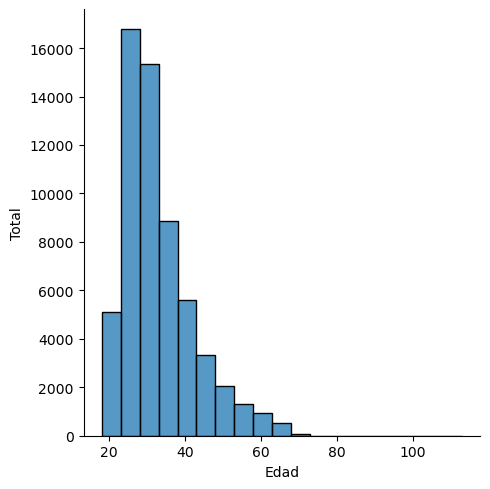

In [8]:
sns.displot(data=perfiles, x="age", kind="hist", binwidth=5)
plt.xlabel("Edad")
plt.ylabel("Total");

Aquí está el mismo gráfico pero desglosado por genero. Parece que están proporcionalmente separados por genero de forma similar, pero aparentemente hay un poco menos de mujeres en general.

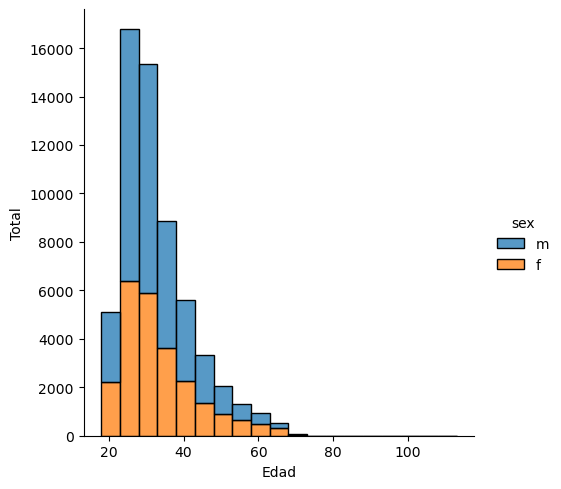

In [9]:
sns.displot(data=perfiles, x="age", hue="sex", kind="hist", binwidth=5, multiple="stack")
plt.xlabel("Edad")
plt.ylabel("Total");

#### Altura

El siguiente gráfico muestra la variable altura, la mayoría de las personas parece estar entre 60 y 80 pulgadas de alto.

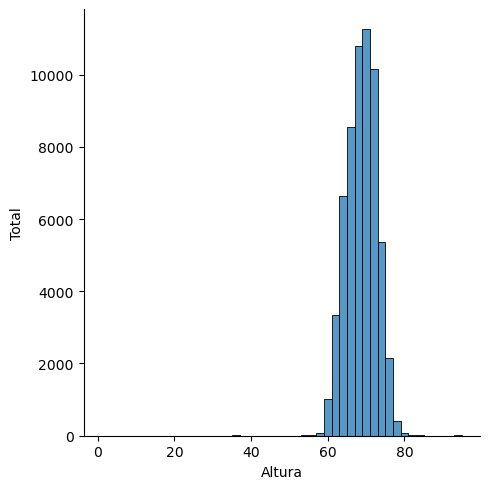

In [10]:
sns.displot(data=perfiles, x="height", kind="hist", binwidth=2)
plt.xlabel("Altura")
plt.ylabel("Total");

Aquí está el mismo gráfico de la altura mostrando el desglose por género. Parece obvio, pero las mujeres tienden a ser más bajas que los hombres y parece tener una distribución normal.

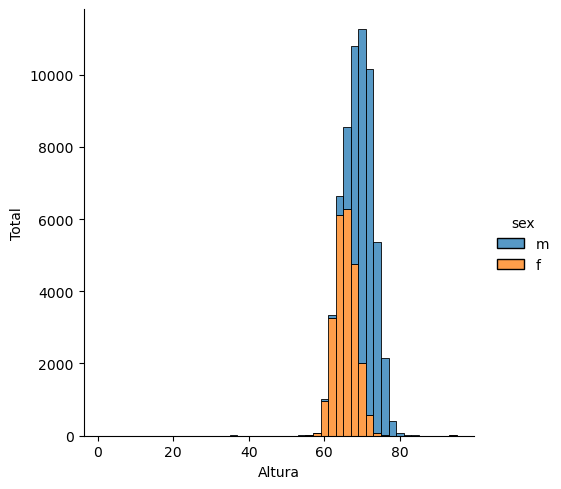

In [11]:
sns.displot(data=perfiles, x="height", hue="sex", kind="hist", binwidth=2, multiple="stack")
plt.xlabel("Altura")
plt.ylabel("Total");

#### Ingresos

Aquí están los datos de los ingresos, parece que la mayoría de los participantes no incluyen sus ingresos.

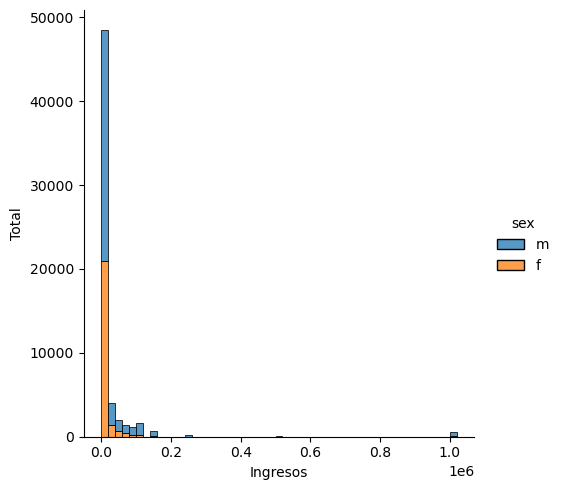

In [12]:
sns.displot(data=perfiles, x="income", hue="sex", kind="hist", binwidth=20000, multiple="stack")
plt.xlabel("Ingresos")
plt.ylabel("Total");

### Variables Discretas

#### Sexo

Previamente, ya se indetificó que hay mas hombres que mujeres en los datos, y parece que hay ~35.000 hombres y ~25.000 mujeres.

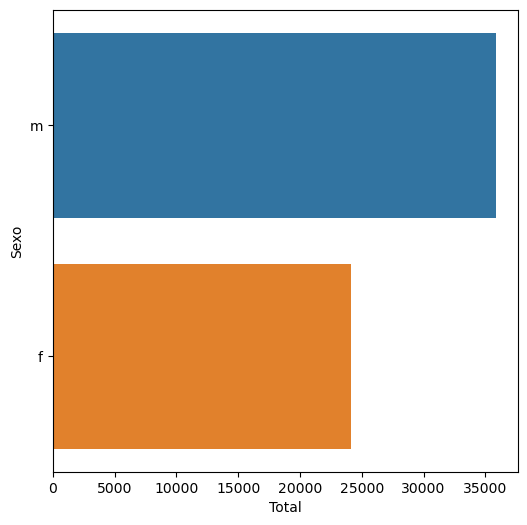

In [13]:
sns.countplot(data=perfiles, y="sex")
plt.xlabel("Total")
plt.ylabel("Sexo");